In [28]:
import itertools
import more_itertools

import numpy as np
import pandas as pd
import sklearn.preprocessing as pp
import matplotlib.pyplot as plt

!pip install fanalysis
from fanalysis.pca import PCA

# Étape 1
## Lecture des données

In [29]:
df = pd.read_excel("Autos_Mixtes.xlsx", sheet_name="Feuil1", index_col=0)
display(df)
print(df.shape)

,puissance,longueur,hauteur,poids,CO2,origine,carburant,4X4
Modele,,,,,,,,
GOLF,75,421,149,1217,143,Europe,Diesel,non
CITRONC4,138,426,146,1381,142,France,Diesel,non
P607,204,491,145,1723,223,France,Diesel,non
VELSATIS,150,486,158,1735,188,France,Diesel,non
CITRONC2,61,367,147,932,141,France,Essence,non
CHRYS300,340,502,148,1835,291,Autres,Essence,non
AUDIA3,102,421,143,1205,168,Europe,Essence,non
OUTLAND,202,455,167,1595,237,Autres,Diesel,oui
PTCRUISER,223,429,154,1595,235,Autres,Essence,non


(10, 8)


Nous avons 10 individus.

# Étape 2
## Identification des types des variables

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, GOLF         to SANTA_FE    
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   puissance  10 non-null     int64 
 1   longueur   10 non-null     int64 
 2   hauteur    10 non-null     int64 
 3   poids      10 non-null     int64 
 4   CO2        10 non-null     int64 
 5   origine    10 non-null     object
 6   carburant  10 non-null     object
 7   4X4        10 non-null     object
dtypes: int64(5), object(3)
memory usage: 720.0+ bytes
None


Nous avons 8 variables. `puissance`, `longueur`, `hauteur`, `poids` et `CO2` sont des variables quantitatives discrètes, alors que `origine`, `carburant` et `4X4` sont quantitatives nominales.


In [31]:
X1 = df[df.columns[:5]]
X2 = df[df.columns[5:]]

n = df.shape[0]

# Étape 3
## Préparation des données quantitatives en vue d'une analyse factorielle
### Standardisation des données (centrage et réduction)

In [32]:
scaler = pp.StandardScaler()
Z1 = scaler.fit_transform(X1)
display(Z1)
print("moyenne:",np.mean(Z1).round(4), ", écart-type:", np.std(Z1).round(4))

array([[-1.1028751 , -0.61403051, -0.41885391, -0.98856229, -1.12656547],
       [-0.30424141, -0.4850325 , -0.73299434, -0.41057935, -1.14762277],
       [ 0.53242246,  1.19194158, -0.83770782,  0.79472655,  0.55801841],
       [-0.1521207 ,  1.06294357,  0.52356739,  0.83701799, -0.17898704],
       [-1.28034925, -2.00720898, -0.62828086, -1.99298388, -1.16868007],
       [ 2.2564571 ,  1.47573719, -0.52356739,  1.18944661,  1.98991471],
       [-0.76060352, -0.61403051, -1.04713477, -1.03085373, -0.60013301],
       [ 0.50706901,  0.26315593,  1.46598868,  0.34361791,  0.85282059],
       [ 0.77328024, -0.4076337 ,  0.10471348,  0.34361791,  0.81070599],
       [-0.46903884,  0.13415793,  2.09426954,  0.91455228,  0.01052865]])

moyenne: -0.0 , écart-type: 1.0


Les données sont bien centrées et réduites.

# Étape 4
## Préparation des données qualitatives en vue d'une analyse factorielle
### Représentation des données sous la forme d'un tableau disjonctif (TDC)

In [33]:
oneHot = pp.OneHotEncoder(sparse = False,)
K = oneHot.fit_transform(X2)

display(K)
print("Modalités:", oneHot.categories_)
print("Modalités avec préfixe (variable rattachée):", oneHot.get_feature_names(X2.columns))

array([[0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1.]])

Modalités: [array(['Autres', 'Europe', 'France'], dtype=object), array(['Diesel', 'Essence'], dtype=object), array(['non', 'oui'], dtype=object)]
Modalités avec préfixe (variable rattachée): ['origine_Autres' 'origine_Europe' 'origine_France' 'carburant_Diesel'
 'carburant_Essence' '4X4_non' '4X4_oui']


### Codage-ACP (pondération par $\sqrt{p_j}$)
## $z_{ij} = \frac{k_{ij}}{\sqrt{p_j}}$
## $p_j = \frac{n_j}{n}$

In [34]:
p_ = np.sum(K, axis=0) / n # vecteur p
Z2 = K / np.sqrt(p_)
print(Z2.round(4))

[[0.     2.2361 0.     1.291  0.     1.118  0.    ]
 [0.     0.     1.5811 1.291  0.     1.118  0.    ]
 [0.     0.     1.5811 1.291  0.     1.118  0.    ]
 [0.     0.     1.5811 1.291  0.     1.118  0.    ]
 [0.     0.     1.5811 0.     1.5811 1.118  0.    ]
 [1.5811 0.     0.     0.     1.5811 1.118  0.    ]
 [0.     2.2361 0.     0.     1.5811 1.118  0.    ]
 [1.5811 0.     0.     1.291  0.     0.     2.2361]
 [1.5811 0.     0.     0.     1.5811 1.118  0.    ]
 [1.5811 0.     0.     1.291  0.     0.     2.2361]]


# Étape 5
## Représentation de la matrice sommaire des données

In [35]:
Z = pd.DataFrame(np.hstack((Z1,Z2)), index=df.index, columns=list(X1.columns) + list(oneHot.get_feature_names(X2.columns)))
display(Z.round(4))

,puissance,longueur,hauteur,poids,CO2,origine_Autres,origine_Europe,origine_France,carburant_Diesel,carburant_Essence,4X4_non,4X4_oui
Modele,,,,,,,,,,,,
GOLF,-1.1029,-0.6140,-0.4189,-0.9886,-1.1266,0.0000,2.2361,0.0000,1.291,0.0000,1.118,0.0000
CITRONC4,-0.3042,-0.4850,-0.7330,-0.4106,-1.1476,0.0000,0.0000,1.5811,1.291,0.0000,1.118,0.0000
P607,0.5324,1.1919,-0.8377,0.7947,0.5580,0.0000,0.0000,1.5811,1.291,0.0000,1.118,0.0000
VELSATIS,-0.1521,1.0629,0.5236,0.8370,-0.1790,0.0000,0.0000,1.5811,1.291,0.0000,1.118,0.0000
CITRONC2,-1.2803,-2.0072,-0.6283,-1.9930,-1.1687,0.0000,0.0000,1.5811,0.000,1.5811,1.118,0.0000
CHRYS300,2.2565,1.4757,-0.5236,1.1894,1.9899,1.5811,0.0000,0.0000,0.000,1.5811,1.118,0.0000
AUDIA3,-0.7606,-0.6140,-1.0471,-1.0309,-0.6001,0.0000,2.2361,0.0000,0.000,1.5811,1.118,0.0000
OUTLAND,0.5071,0.2632,1.4660,0.3436,0.8528,1.5811,0.0000,0.0000,1.291,0.0000,0.000,2.2361
PTCRUISER,0.7733,-0.4076,0.1047,0.3436,0.8107,1.5811,0.0000,0.0000,0.000,1.5811,1.118,0.0000


$p_1 \rightarrow$ nombre de variables quantitatives

$p_2 \rightarrow$ nombre de variables qualitatives

$m \rightarrow$ nombre de modalités

$p \rightarrow$ dimension de $Z: p_1 +m$

In [36]:
p1 = Z1.shape[1]
p2=X2.shape[1]
m=Z2.shape[1]
p=p1+m

# Étape 6
## Analyse du nombre de facteurs principaux à retenir

> On garde les premiers axes factoriels selon certains critères (critère du
coude, de Kaiser, ...) qui permettent d’avoir suffisamment d’information sur les données.
> - La transformation en TDC entraine une redondance des données $\rightarrow$ on garde au plus $p − p_2$ axes factoriels.
- Le crière de Kaiser utilisé dans l’ACP, ne peut pas être appliqué ici parce que certaines variables ne sont pas nativement quantitatives $\rightarrow$ on utilisera le diagramme de coude.



In [37]:
nb_axes_max = p-p2

In [38]:
afdm = PCA(std_unit=False, row_labels=Z.index, col_labels=Z.columns)
afdm.fit(Z.to_numpy());

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


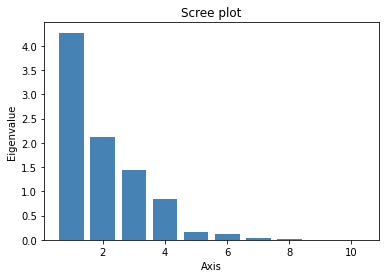

In [39]:
afdm.plot_eigenvalues()

Selon le diagramme de coude, on devrait retenir 4 facteurs principaux, mais étant donnée que ça complexifie la visualisation ($4 \choose 3$ visualisations dans l'espace 3D), on va s'en tenir à 2 composantes principales. On réussit quand même à retenir environ 71% de la variance.

# Étape 7
## Déterminer les valeurs propres de l'ensemble des données

L'AFDM consiste à utiliser une ACP normée.

$\lambda_k = \sum_j r^2(F_k, X_j) + \sum_j \eta^2(F_k,X_j)$ avec $0 \lt r^2 \lt1$ et $0 \lt \eta^2 \lt 1$, donc les valeurs sont comparables.

>- La représentation des variables quantitatives et qualitatives dans le même repère est un vrai défi et pose une complexité de calcul.
- Par contre, la représentation des corrélations entre les différentes variables et les axes factoriels peut être une solution : les carrés des corrélations (variables quantitatives) et des rapports de corrélation (qualitatives) avec les facteurs.



L'attribut `.eig_` de l'objet `PCA` contient :

- en 1ère ligne : les valeurs propres en valeur absolue
- en 2ème ligne : les valeurs propres en pourcentage de la variance totale
- en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [40]:
pd.DataFrame(afdm.eig_.round(3), index = ["Valeur propre", "%", "Cumul %"], columns=range(1, afdm.eig_.shape[1]+1))

,1,2,3,4,5,6,7,8,9,10
Valeur propre,4.273,2.122,1.439,0.836,0.164,0.114,0.034,0.016,0.002,0.0
%,47.479,23.577,15.986,9.293,1.823,1.272,0.374,0.176,0.022,0.0
Cumul %,47.479,71.056,87.042,96.335,98.157,99.429,99.803,99.978,100.000,100.0


> - Objectif : de produire un premier axe factoriel F1 qui soit le plus lié possible avec les variables.
> - Si la liaison n’est pas parfaite, un second axe factoriel est déterminé pour expliquer l’information résiduelle, non prise en compte par le premier et ainsi de suite...

In [82]:
col_coord = np.sqrt(afdm.eig_[0]) * afdm.eigen_vectors_

# Étape 8
## Déterminer la contribution des variables aux 2 premiers axes factoriels

- Le carré du rapport de corrélation caractérise, pour chaque variable, la dispersion relative de ses modalités.
- Il se définit par le ratio entre la variance inter-modalités et la variance totale.
- Pour la variable j, le carré du rapport de corrélation sur le facteur $h$ est donné par :

$$r^2(F_h,X_j) = G^2_{jh}$$

$$\eta^2(F_h,X_j) = \sum_{k \in X_j} G^2_{kh}$$

avec $G_{kh}$ les coordonnées de la modalité $k$ sur l'axe factoriel $h$.

- $G_{kh}^2 = \mu^2_{kh} \times \frac{p_k}{\lambda_h}$

Contribution variable quantitative: $$Ctr_j(F_h) = \frac {r^2(F_h,X_j)}{\lambda_h}$$

Contribution variable qualitative: $$Ctr_j(F_h) = \frac {\eta^2(F_h,X_j)}{\lambda_h}$$

In [41]:
r_squared_F1_F2_ = afdm.col_coord_[:p1,:2] **2

pos = (map(len, [[]] + oneHot.categories_))
cumul = (itertools.accumulate(pos))
ranges = (more_itertools.pairwise(cumul))
eta_squared_F1_f2_ = np.array([np.sum(afdm.col_coord_[p1+r[0]:p1+r[1],:2] ** 2,axis=0) for r in ranges])

In [42]:
stacked = np.vstack((r_squared_F1_F2_, eta_squared_F1_f2_))
contrib_ = np.array([var_ / afdm.eig_[0,:2] for var_ in stacked])

display(stacked)
print(np.sum(stacked,axis=0))
print("-"*80)
display(contrib_)

array([[0.67132603, 0.29072151],
       [0.6339052 , 0.05997081],
       [0.33451975, 0.583062  ],
       [0.86400031, 0.00373703],
       [0.79327801, 0.14362903],
       [0.69656654, 0.01600997],
       [0.02826231, 0.4046389 ],
       [0.25127747, 0.62011806]])

[4.27313563 2.12188732]
--------------------------------------------------------------------------------


array([[0.15710384, 0.13701082],
       [0.14834661, 0.02826296],
       [0.07828438, 0.27478462],
       [0.20219351, 0.00176118],
       [0.18564307, 0.06768928],
       [0.16301063, 0.00754515],
       [0.00661395, 0.19069764],
       [0.058804  , 0.29224835]])

Sur le premier tableau ci-dessus, on peut voir les $r^2$ et $\eta^2$ des deux premiers axes factoriels. Si l'on somme verticalement, on obtient efefctiment $\lambda_1$ et $\lambda_2$.

Sur le deuxième tableau, il s'agit des contributions.

,Axe factoriel 1,Axe factoriel 2
puissance,0.157104,0.137011
longueur,0.148347,0.028263
hauteur,0.078284,0.274785
poids,0.202194,0.001761
CO2,0.185643,0.067689
origine,0.163011,0.007545
carburant,0.006614,0.190698
4X4,0.058804,0.292248


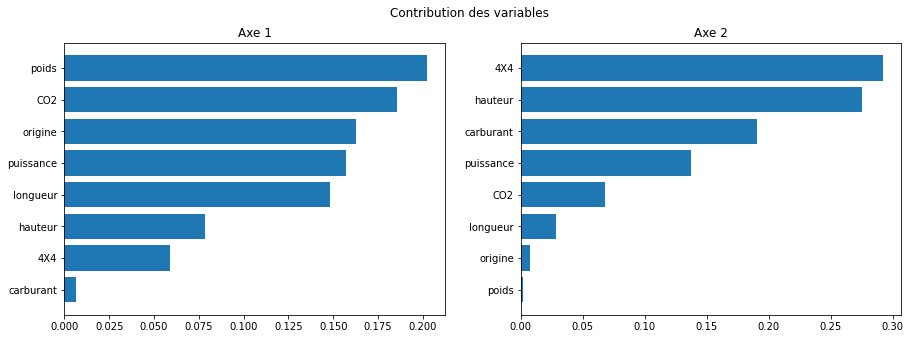

In [43]:
display(pd.DataFrame(contrib_, index=df.columns, columns=list(map(lambda axe: 'Axe factoriel ' + str(axe), range(1,3)))))

plt.figure(figsize=(15,5))

axe1 = np.array(sorted(list(zip(df.columns,contrib_[:,0])),key = lambda x: x[1]))
axe2 = np.array(sorted(list(zip(df.columns,contrib_[:,1])),key = lambda x: x[1]))

plt.subplot(1,2,1)
plt.barh(y=axe1[:,0], width=axe1[:,1].astype(float))
plt.title("Axe 1")

plt.subplot(1,2,2)
plt.barh(y=axe2[:,0], width=axe2[:,1].astype(float))
plt.title("Axe 2")

plt.suptitle("Contribution des variables");

Pour le premier axe factoriel, `poids`, `CO2`, `puissance`, `origine` et `longueur` sont les variables qui contribuent le plus, à hauteur d'environ 17% chacun. La variable `carburant` a une participation pratiquement nulle à la variance restituée sur cet axe. Pour ce qui est du deuxième axe, il s'agit de `4X4` et `hauteur` avec environ 27%.

# $\boxed{\color{green}{Bonus}}$

Si l'on veut plutôt obtenir la qualité de représentation ($\cos^2, Qlt$), alors pour les variables quantitatives:

$$\cos^2_j(F_h) = r^2(F_h,X_j)$$

et pour les variables qualitatives:

$$\cos^2_j(F_h) = \frac{\eta^2(F_h,X_j)}{m_j-1}$$



In [44]:
m_ = map(len, oneHot.categories_)
cos2_qual = map(lambda var_, m_j: var_ / (m_j - 1), eta_squared_F1_f2_, m_)

qlt = np.vstack((r_squared_F1_F2_,list(cos2_qual)))
display(pd.DataFrame(qlt, index=df.columns, columns=map(
    lambda axe: 'Axe factoriel ' + str(axe), range(1,3))).sort_values(by="Axe factoriel 1", ascending=False))

,Axe factoriel 1,Axe factoriel 2
poids,0.864000,0.003737
CO2,0.793278,0.143629
puissance,0.671326,0.290722
longueur,0.633905,0.059971
origine,0.348283,0.008005
hauteur,0.334520,0.583062
4X4,0.251277,0.620118
carburant,0.028262,0.404639


On peut voir qu'il y a un lien entre la contribution et la qualité. En effet, pour les variables quantitatives, elles gardent leur ordre repectifs puisque 

$$\cos^2_j(F_h) = {Ctr_j(F_h)}\times{\lambda_h}$$

Pour ce qui est des variables qualitatives, c'est différent pusique la qualité est obtenue en divisant $\eta^2(F_h,X_j)$ par son nombre de modalité $- 1$:

$$\cos^2_j(F_h) = \frac{{Ctr_j(F_h)}\times{\lambda_h}}{m_j-1}$$

Donc la qualité dépend du nombre de modalités; plus il y a de modalités, plus la qualité diminue.

# Étape 9
## Représenter graphiquement les variables et les individus sur le même graphique

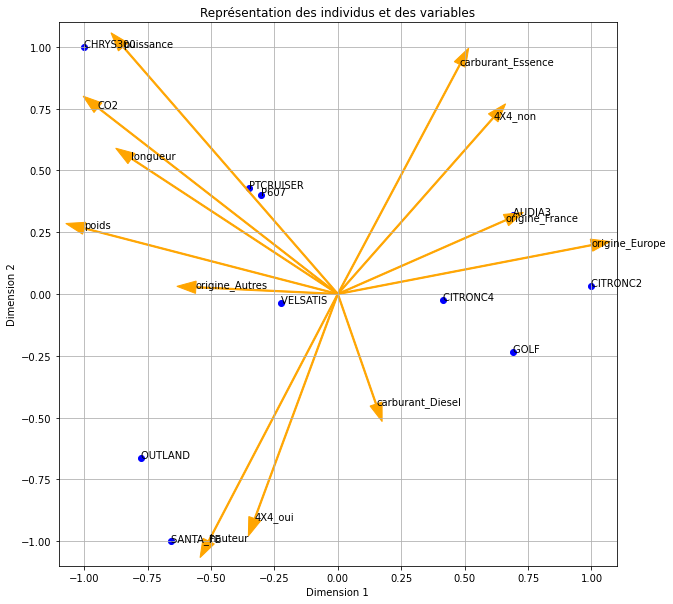

In [45]:
plt.figure(figsize=(10,10))

scaler = pp.MinMaxScaler(feature_range=(-1,1))
coord_ind = scaler.fit_transform(afdm.row_coord_[:,:2])
coord_var = scaler.fit_transform(afdm.col_coord_[:,:2])

for coord, label in zip(coord_ind, Z.index):
    plt.scatter(coord[0], coord[1], c = "blue")
    plt.annotate(label, (coord[0], coord[1]))

for coord, label in zip(coord_var, Z.columns):
    plt.arrow(0,0,coord[0],coord[1], width=0.005, color="orange", head_width=0.05)
    plt.annotate(label, (coord[0], coord[1]))

plt.title("Représentation des individus et des variables")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid();

Avec cette représentation, on peut voir les individus qui se ressemblent (comme `PTCBUISER` et `P607`), les variables qui ont des liaisons entre elles (comme `hauteur` et `4X4_oui`), mais surtout, voir quelles caractéristiques (variables) rassemblent certains individus. Par exemple, `OUTLAND` et `SANTA_FE` sont caractérisés par `hauteur` et `4X4_oui`, alors que ce qui définit le plus `AUDIA3` est `origine_France`. Il en va de même avec `CHRYS300` et `puissance`.

Je n'arrive pas à la même représentation que celle obtenue sur les diapositives. J'imagine que c'est lié au *scaling*, mais sur mon graphique, `carburant_Diesel` est plutôt éloigné de `OUTLAND`, alors que ce n'est pas vraiment le cas sur la diapositive 43/43.